In [2]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [10]:
user_name = os.environ.get('DB_USER')
password = os.environ.get('DB_PASSWORD')

In [225]:
cnx = mysql.connector.connect(user=user_name, password=password,host='localhost',database='FilePaths')

In [226]:
# create cursor to read or write
cursor = cnx.cursor()

# Abundance plot of bacteria in a single replicate

In [60]:
get_one_path = """
                SELECT *
                FROM FilePath
                WHERE filePath = '/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/6/growth_file.txt'
                """
cursor.execute(get_one_path)
record = cursor.fetchone()[0]
record

'/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/6/growth_file.txt'

In [73]:
growth_df = pd.read_csv(record, sep=" ")
growth_df.head()

,time,OD,liquidtotalcount,liquidactivecount
0,0,0.006,3842,3347
1,4,0.020,21384,20822
2,8,0.235,274151,273211
3,12,0.657,687792,686372
4,16,0.845,866130,864670


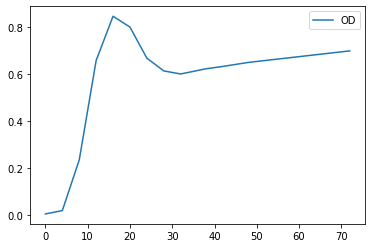

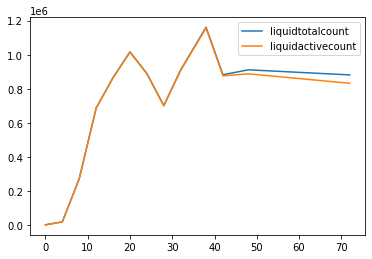

In [213]:
plt.plot('time', 'OD', data=growth_df, linestyle='-')
plt.legend()
plt.show()

plt.plot('time', 'liquidtotalcount', data=growth_df, linestyle='-')
plt.plot('time', 'liquidactivecount', data=growth_df, linestyle='-')
plt.legend()
plt.show()

# Abundance plot of bacteria in a single experiment/perturbation (mean and standard deviation os a set of replicates)

For the moment, as I am working with a tmp database containing only the complete paths, I cannot run a query specifying an experiment name. I will use the LIKE flag to obtain the paths that I want.

The aim is to obtain a df and from there a plot with the mean and average for a single experiment. 

In the future, when I work with the true db, the aim will be to get a df with the info from all the replicates and from there I will already have the code done.

In [262]:
# This will go a function in the db script

get_several_paths = """
                SELECT *
                FROM FilePath
                WHERE filePath like "/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1%"
                """
cursor.execute(get_several_paths)
records = cursor.fetchall()

## Be careful!!!!

cursor.fetchall() --> returns a list of tuples!!!!

getMatchingList --> returns a list of str!!!

In [263]:
records

[('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/1/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/1/growth_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/1/metabolites_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/1/pH_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/2/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/2/growth_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/2/metabolites_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/2/pH_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/3/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/3/growth_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/3/metabolites_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/3/pH_file.txt',),
 ('/

In [252]:
# Using regex so it is case insensitive and look for patterns inside words (not only complete words)

def getMatchingList(regex, lst):
    list = []
    for word in lst:
        if regex.findall(word[0]):
            tup = (word[0],)
            list.append(tup)
    return list

In [253]:
regex = re.compile(r'.*abundance*', flags=re.I | re.X)
getMatchingList(regex, records)

[('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/1/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/2/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/3/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/4/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/5/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/6/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/7/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/8/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/9/abundance_file.txt',)]

In [254]:
def choosePlot(records, tp):
    regex = re.compile(r'.*{}*'.format(tp), flags=re.I | re.X)
    lst = getMatchingList(regex, records)
    return lst

In [268]:
new_lst = choosePlot(records, 'abundance')
new_lst

[('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/1/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/2/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/3/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/4/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/5/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/6/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/7/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/8/abundance_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/BT_batch_mucin1/9/abundance_file.txt',)]

In [269]:
def getMeanStd(records, header):
    df = pd.DataFrame(columns=range(len(records)+1)) #Each column will be the value of each record
    
    # Fill the df parsing all the records' files
    for i, record in enumerate(records, 1):
        record_df = pd.read_csv(record[0], sep=" ")
        df.iloc[:,i] = record_df[header]

    # Calculate and keep mean and std
    df_res = pd.DataFrame(columns=range(3))
    df_res.set_axis(['time', 'mean', 'std'], axis='columns', inplace=True)
    df_res['time'] = record_df['time']
    df_res['mean'] = df.iloc[:,1:].mean(axis=1, numeric_only=True)
    df_res['std'] = df.iloc[:,1:].std(axis=1, numeric_only=True)
    
    return df_res

In [270]:
OD_msd = getMeanStd(new_lst, 'OD')
#OD_msd

lqdactive_msd = getMeanStd(new_lst, 'liquidactivecount')
#active_msd

lqdtotal_msd = getMeanStd(new_lst, 'liquidtotalcount')
#lqdtotal_msd

In [271]:
def plotOneExperiment(dfs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('time', fontsize = 16)
    ax.set_ylabel('abundance', fontsize = 16)
    
    cmap = plt.get_cmap(name='tab10')

    for i, df in enumerate(dfs, 1):
        ax.errorbar(df.iloc[:,0], df['mean'], yerr = df['std'], color = cmap(i-1))
        
    plt.show()

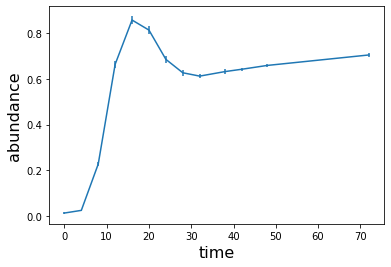

In [272]:
plotOneExperiment([OD_msd])

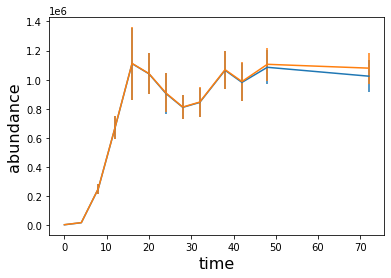

In [273]:
plotOneExperiment([lqdactive_msd,lqdtotal_msd])